# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

##### Explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal. And answer the following questions:

- 1.Do the users spend more time on the new landing page than on the existing landing page?
- 2.Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- 3.Does the converted status depend on the preferred language?
- 4.Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Reading the Data into a DataFrame

In [2]:
data = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
data.shape

(100, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#check for missing values
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [9]:
#check for duplicates
data.duplicated().sum()

0

### Univariate Analysis

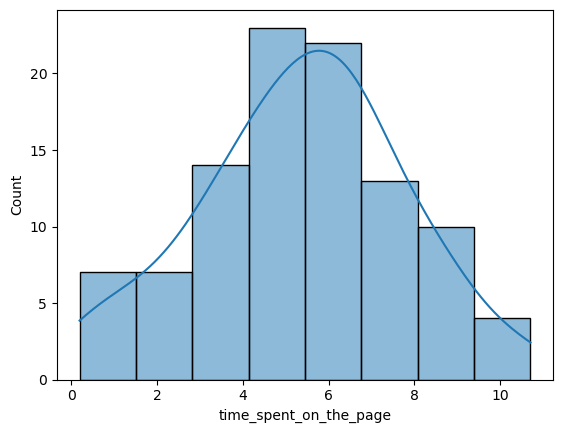

In [10]:
sns.histplot(data=data, x='time_spent_on_the_page',kde=True);

### Obeservation:
##### The time_spent_on_the_page variable is nearly normal distribution. 
##### The average time spent on the page is in the range of (5,6)minutes. 

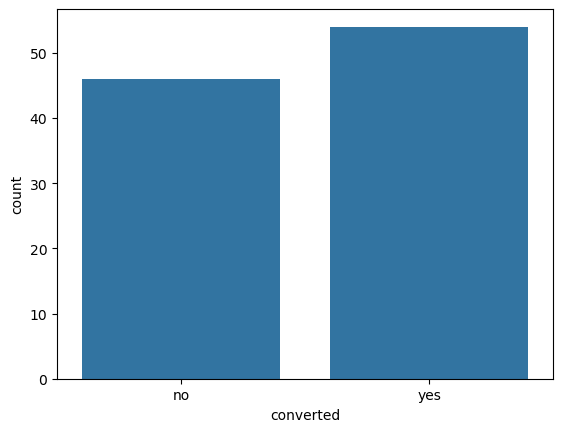

In [11]:
sns.countplot(data=data, x='converted');

### Obeservation:
##### The conversion rate of users((the proportion of users who visit the landing page and get converted)) is around 50% - 55%.

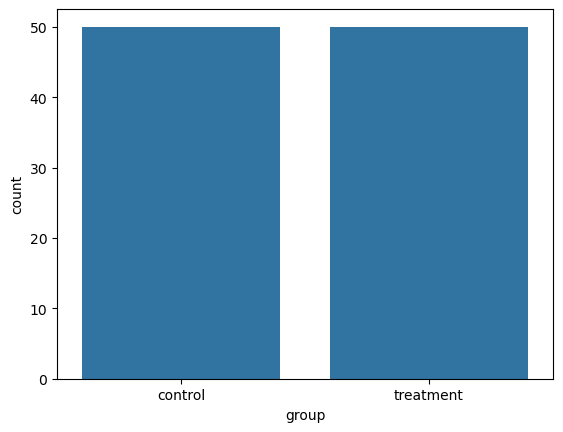

In [12]:
sns.countplot(data=data, x='group');

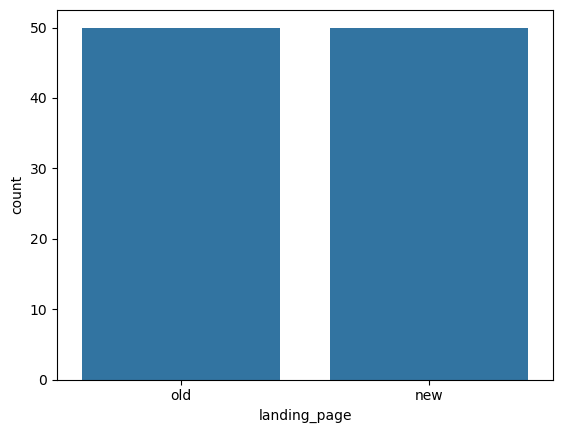

In [13]:
sns.countplot(data=data, x='landing_page');

### Obeservation:
##### The treatment group and control group have same number of users,which is 50. So as the new landing page and the existing landing page.

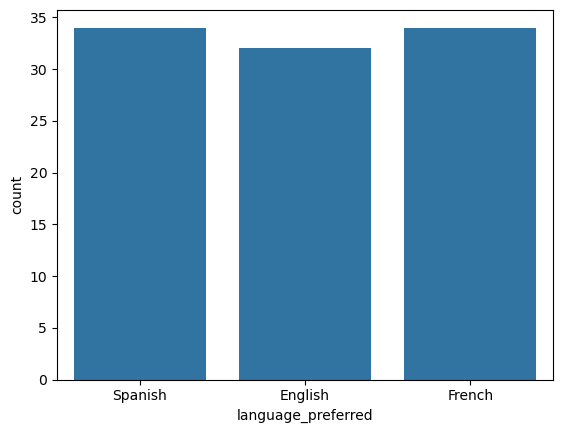

In [14]:
sns.countplot(data=data, x='language_preferred');

### Obeservation:
##### users have different language preferrance, including Spanish, English, and French. All of the language group have more than 30 users.

### Bivariate Analysis

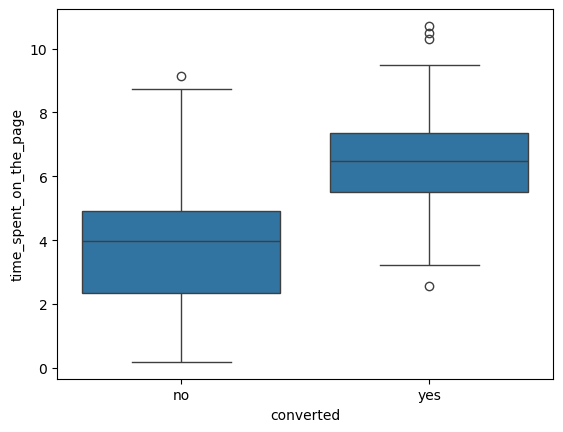

In [15]:
sns.boxplot(data=data, x='converted',y='time_spent_on_the_page');

### Observation:
##### Users who get converted spend more time than the users who don't get converted.

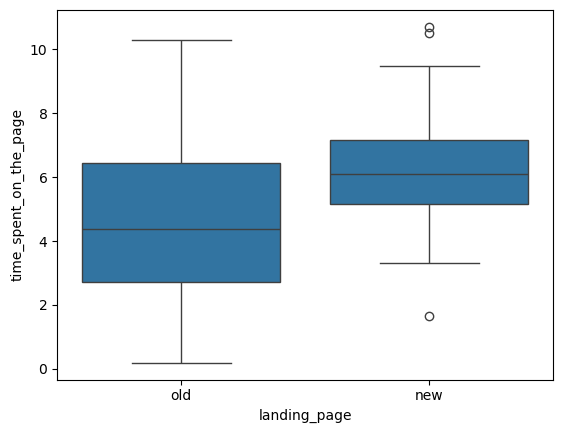

In [16]:
sns.boxplot(data=data, x='landing_page', y='time_spent_on_the_page');

#### Oberservation:
##### users spent more time on the new landing page than than the existing landing page.

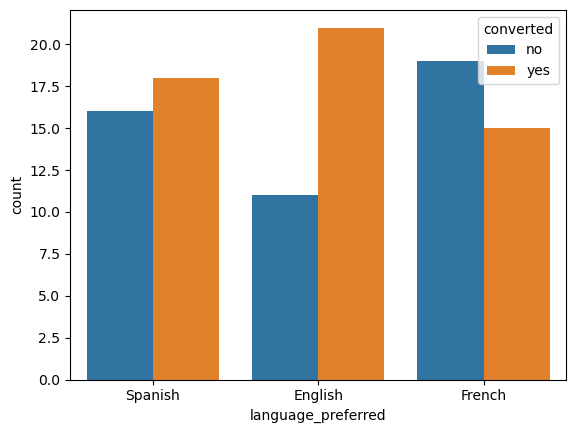

In [17]:
sns.countplot(data=data, x='language_preferred', hue='converted');

### Obeservation:
##### The conversion rate of English users is the highest,well above 50%. The conversion rate of Spanish users are slightly higher than 50%. The conversion rate of French users are lower than 50%.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

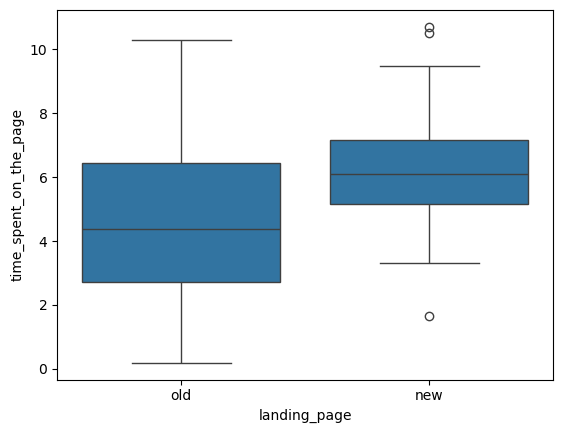

In [18]:
sns.boxplot(data=data, x='landing_page',y='time_spent_on_the_page');

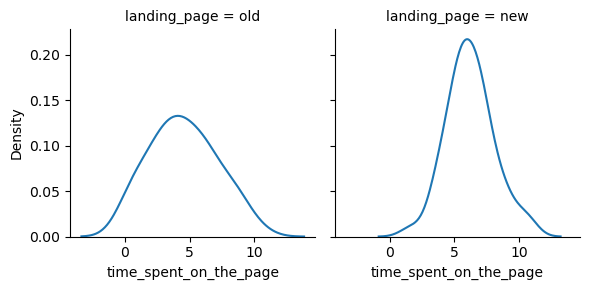

In [19]:
g = sns.FacetGrid(data, col='landing_page')
g.map(sns.kdeplot,'time_spent_on_the_page');

### Step 1: Define the null and alternate hypotheses

##### Null hypothese: users spend the same amount of time on the new and the existing landing page. H0: u1 = u2.
##### Alternate hypothese: users spend more time on the new landing page than the existing landing page. Ha: u1 > u2.

### Step 2: Select Appropriate test

Since we are comparing two sample's mean, the variable for both group is nearly normal distribution, and the standard deviation is unkown, this should be a 2 sample t-test.

### Step 3: Decide the significance level

the level of significance will be 0.05

### Step 4: Collect and prepare data

In [20]:
sample1 = data[data.landing_page == 'new'].time_spent_on_the_page
sample2 = data[data.landing_page == 'old'].time_spent_on_the_page

### Step 5: Calculate the p-value

In [21]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print(p_value)

0.00013923812251665497


### Step 6: Compare the p-value with $\alpha$

P-value is smaller than 0.05.

### Step 7:  Draw inference

we can reject the null hypothesis, which means, we have enough evidence to claim that, users spend more time on the new landing page than the existing landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

#### Visual Analysis

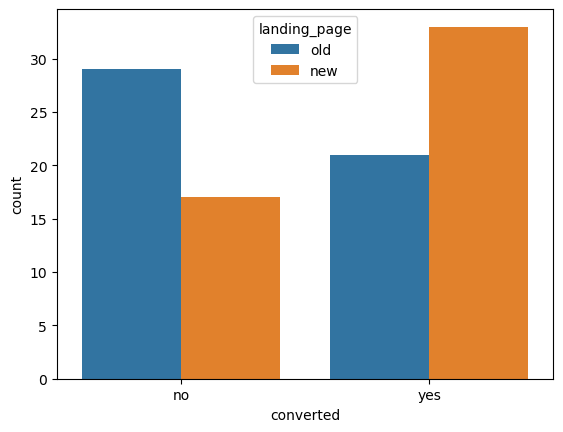

In [22]:
sns.countplot(data=data, x='converted',hue='landing_page');

#### Step 1: Define the null and alternate hypotheses
##### null hypothesis:the conversion rate for the new page is the same as the conversion rate for the old page. H0:P1=P2
##### alternative hypothesis: the conversion rate for the new page is greater than the conversion rate for the old page. Ha:P1>P2
#### Step 2: Select appropriate test
##### 2 propotion z test
#### Step 3: Decide the significance level
##### the level of significance will be 0.05
#### Step 4: Collect and prepare data

In [23]:
converted_new = data[data['landing_page'] == 'new']['converted'].value_counts().yes
converted_old = data[data['landing_page'] == 'old']['converted'].value_counts().yes
converted_num = np.array([converted_new, converted_old])
nobs = np.array([50,50])
print(converted_new)
print(converted_old)
print(converted_num)
print(nobs)

33
21
[33 21]
[50 50]


#### Step5: Calculate P value

In [24]:
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value = proportions_ztest(converted_num, nobs)
print(p_value)

0.016052616408112556


#### Step6: Compare the p-value with $\alpha$
##### p value is smaller than 0.05

#### Step7: Draw inference
##### since p value is smaller than 0.05, we can reject the null hypothesis, which means that, we have enough evidence to claim the conversion rate for the new page is greater than the existing page.

## 3. Is the conversion and preferred language are independent or related?

#### Step 1: Define the null and alternate hypotheses
##### null hypothesis:converted and preferred language are independent.
##### alternative hypothesis: converted and preferred language are not independent.
#### Step 2: Select appropriate test
##### chi-square test of independence
#### Step 3: Decide the significance level
##### the level of significance will be 0.05
#### Step 4: Collect and prepare data

In [25]:
c_table = pd.crosstab(data.converted, data.language_preferred)
print(c_table)

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


#### Step5: Calculate P value

In [26]:
from scipy.stats import chi2_contingency
chi,p_value,dof,expected = chi2_contingency(c_table)
print(p_value)

0.21298887487543447


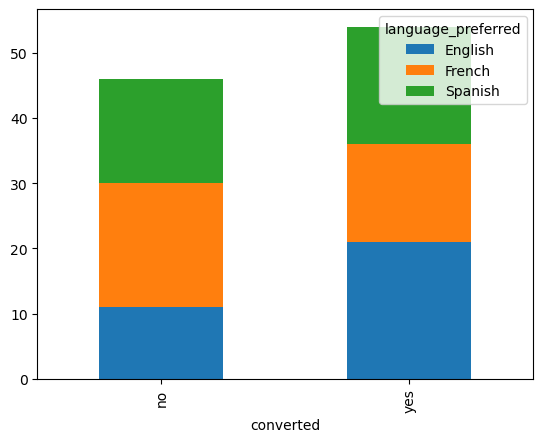

In [27]:
c_table.plot(kind='bar',stacked=True);

#### Step6: Compare the p-value with $\alpha$
##### p value is larger than 0.05

#### Step7: Draw inference
##### since p value is larger than 0.05, we fail to reject the null hypothesis, which means that, we have enough evidence to claim that, the convertion and language preferance are independent.

## 4. Is the time spent on the new page same for the different language users?

#### Step 1: Define the null and alternate hypotheses
##### null hypothesis:average time spent on the new page is same for the different language users. H0:u1=u2=u3
##### alternative hypothesis: average time spent on the new page is not the same for the different language users. Ha: at least one of u1, u2, u3 is not the same with the others.
#### Step 2: Select appropriate test
##### one-way ANOVA
#### Step 3: Decide the significance level
##### the level of significance will be 0.05
#### Step 4: Collect and prepare data

In [28]:
new_data = data.loc[data['landing_page'] == 'new']

In [29]:
new_data.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

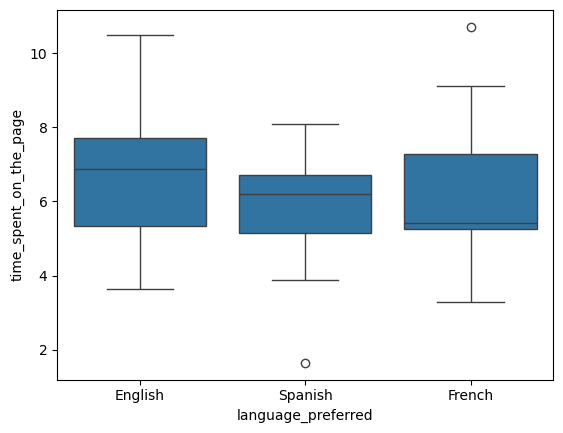

In [30]:
sns.boxplot(data=new_data,x='language_preferred', y='time_spent_on_the_page');

#### Step 5: Calculate p value

In [31]:
from scipy.stats import f_oneway
sample1 = new_data.loc[new_data.language_preferred == 'English', 'time_spent_on_the_page']
sample2 = new_data.loc[new_data.language_preferred == 'Spanish', 'time_spent_on_the_page']
sample3 = new_data.loc[new_data.language_preferred == 'French', 'time_spent_on_the_page']
test_stat, p_value = f_oneway(sample1, sample2, sample3)
print(p_value)

0.43204138694325955


#### Step6: Compare the p-value with $\alpha$
##### p value is larger than 0.05

#### Step7: Draw Inference
##### since p value is larger than 0.05, we fail to reject the null hypothesis, which means that, we have enough evidence to claim, average time spent on the new page is same for the different language users.

## Conclusion and Business Recommendations

#### Conclusions: 
1. users spend more time on the new landing page than the existing landing page.
2. conversion rate for the new page is greater than the existing page.
3. the convertion and language preference are independent.
4. average time spent on the new page is same for the different language users.¶

#### Business Recommendations:
1. since the new landing page has better business performance, we e-news should use the new landing page than the existing landing page.
2. since language preference is independent with the conversion rate,currently e-news doesn't have to make any specific move surrounding the language preference factor.
3. users who spend more time on the landing page tend to get converted. e-news can exlore different ways to make users spend more time on the landing page, to improve their conversion rate.

___